### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (x) y la edad de los alumnos (y) de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

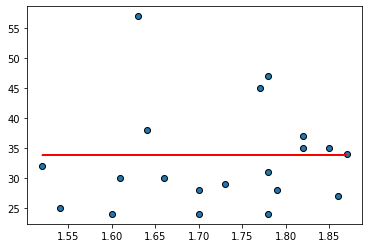

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics

lista_edad_altura = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82)]

df = pd.DataFrame(lista_edad_altura, columns=["Nombre", "Edad", "Altura"])
y = df.Edad
y = np.array(y).reshape(-1,1)
X = df.Altura
X = np.array(X).reshape(-1,1)

# se crean los conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#Creación del objeto LinearRegression
lm = LinearRegression(n_jobs=-1)  # -1 para usar todos los procesadores
lm.fit(X_train, y_train)    #Entrenar el modelo

# Predecir el conjunto de valor en función de la muestra de test
predictions = lm.predict(X_test)

plt.scatter(data=df, x='Altura', y='Edad', edgecolor='black')
plt.plot(X, lm.predict(X), color='red')

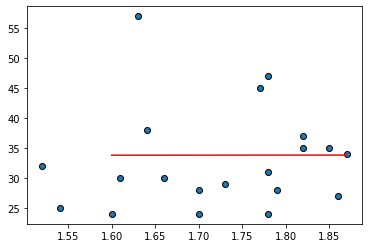

In [2]:

plt.scatter(data=df, x='Altura', y='Edad', edgecolor='black')
plt.plot(X_test, predictions, color='red')

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué?
No es una buena técnica ya que las variables no están correlacionadas. 
 


- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
Ninguno es mejor ya que se comete demasiado error en la predicción

----------Error medio------------
6.559232784863781
6.559232784863781
----------Error cuadrático medio------------
70.5477609186342
70.5477609186342
----------Raíz del error cuadrático medio------------
8.399271451657828
8.399271451657828


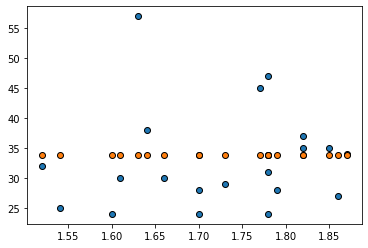

In [11]:
df['EdadPredict']= lm.predict(X)
plt.scatter(data=df, x='Altura', y='Edad', edgecolor='black')
plt.scatter(data=df, x='Altura', y='EdadPredict', edgecolor='black')

# calculo manual de errores y metricas
# Error medio
df = df.assign(errorMedio = abs(df.Edad - df.EdadPredict))
print("----------Error medio------------")
print(df.errorMedio.mean())
print(metrics.mean_absolute_error(df['Edad'], df['EdadPredict']))


# Error cuadrático medio
df = df.assign(errorCuadraticoMedio = (df.Edad - df.EdadPredict)**2)
print("----------Error cuadrático medio------------")
print(df.errorCuadraticoMedio.mean())
print(metrics.mean_squared_error(df['Edad'], df['EdadPredict']))


# Error cuadrático medio
print("----------Raíz del error cuadrático medio------------")
print(np.sqrt(df.errorCuadraticoMedio.mean()))
print(np.sqrt(metrics.mean_squared_error(df['Edad'], df['EdadPredict'])))


- Representa la matriz de correlación, ¿los datos están correlacionados?
No, los datos no están correlacionados (cercanos al 0: 0'087)

<AxesSubplot:>

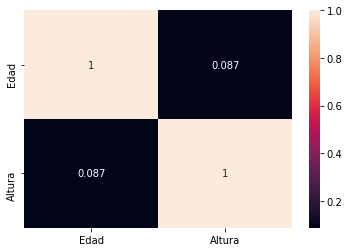

In [12]:
df2 = pd.DataFrame(lista_edad_altura, columns=["Nombre", "Edad", "Altura"])
sns.heatmap(df2.corr(), annot = True)


- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 
Si la altura se multiplica por dos, la recta de predicciones deja de estar centrada en la nube de puntos, lo cvual es muy extraño.
Si la edad de multiplica por dos, la recta de predicciones vuelve a ubicarse en el centro de la nube de puntos.

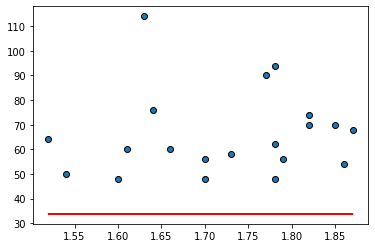

In [23]:
df3 = pd.DataFrame(lista_edad_altura, columns=["Nombre", "Edad", "Altura"])
df3= df3.assign(Edad=df3.Edad*2)

# se generan los arrays a partir de la variable target (Edad) y de estudio (altura)
y2 = df3.Edad
y2 = np.array(y2).reshape(-1,1)
X2 = df3.Altura
X2 = np.array(X2).reshape(-1,1)

# se crean los conjunto de entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

#Creación del objeto LinearRegression
lm2 = LinearRegression(n_jobs=-1)  # -1 para usar todos los procesadores
lm2.fit(X2_train, y2_train)    #Entrenar el modelo

# Predecir el conjunto de valor en función de la muestra de test
predictions = lm.predict(X2_test)

plt.scatter(data=df3, x='Altura', y='Edad', edgecolor='black')
plt.plot(X2, lm.predict(X2), color='red')

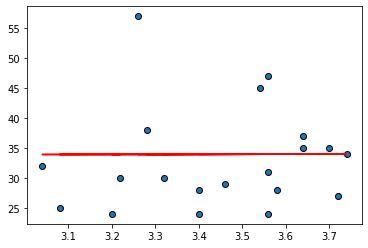

In [24]:
df4 = pd.DataFrame(lista_edad_altura, columns=["Nombre", "Edad", "Altura"])
df4= df4.assign(Altura=df3.Altura*2)

# se generan los arrays a partir de la variable target (Edad) y de estudio (altura)
y3 = df4.Edad
y3 = np.array(y3).reshape(-1,1)
X3 = df4.Altura
X3 = np.array(X3).reshape(-1,1)

# se crean los conjunto de entrenamiento y prueba
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

#Creación del objeto LinearRegression
lm3 = LinearRegression(n_jobs=-1)  # -1 para usar todos los procesadores
lm3.fit(X3_train, y3_train)    #Entrenar el modelo

# Predecir el conjunto de valor en función de la muestra de test
predictions = lm.predict(X3_test)

plt.scatter(data=df4, x='Altura', y='Edad', edgecolor='black')
plt.plot(X3, lm.predict(X3), color='red')